# Import libraries

In [19]:
#Let's start off by loading the libraries required for this project
#Import libraries
import numpy as np
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import StratifiedKFold
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [2]:
#Load dataset
import pandas as pd
filename='c:/Users/Amir/Desktop/capstone002/letter-recognition.csv'
names=['lettr','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx'] 
letter_data = pd.read_csv(filename,names=names)


# Dimensions of the Dataset

In [3]:
#shape
print(letter_data.shape)

(20000, 17)


In [4]:
#head
letter_data.head(10)

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [5]:
letter_data_numerical=letter_data.drop(['lettr'],axis=1)

In [6]:
print(letter_data_numerical.head())

   x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      2      8      3     5      1      8     13      0      6      6     10   
1      5     12      3     7      2     10      5      5      4     13      3   
2      4     11      6     8      6     10      6      2      6     10      3   
3      7     11      6     6      3      5      9      4      6      4      4   
4      2      1      3     1      1      8      6      6      6      6      5   

   xy2br  x-ege  xegvy  y-ege  yegvx  
0      8      0      8      0      8  
1      9      2      8      4     10  
2      7      3      7      3      9  
3     10      6     10      2      8  
4      9      1      7      5     10  


In [7]:
#Description
print(letter_data.describe())

              x-box         y-box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x-bar         y-bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

# Letter Distribution

In [ ]:
#Class distribution
print(letter_data.groupby('lettr').size())

# Data Visualization

# Univariate plots

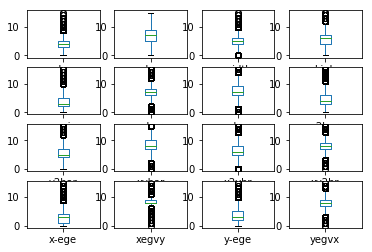

In [9]:
#box and whisker plots
letter_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

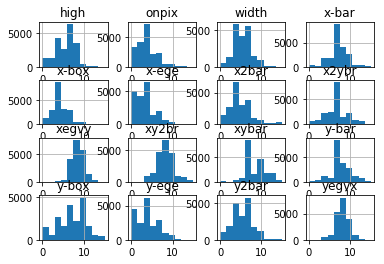

In [10]:
# histograms
#Some of the distribution are gaussian
letter_data.hist()
plt.show()

# Multivariate plots

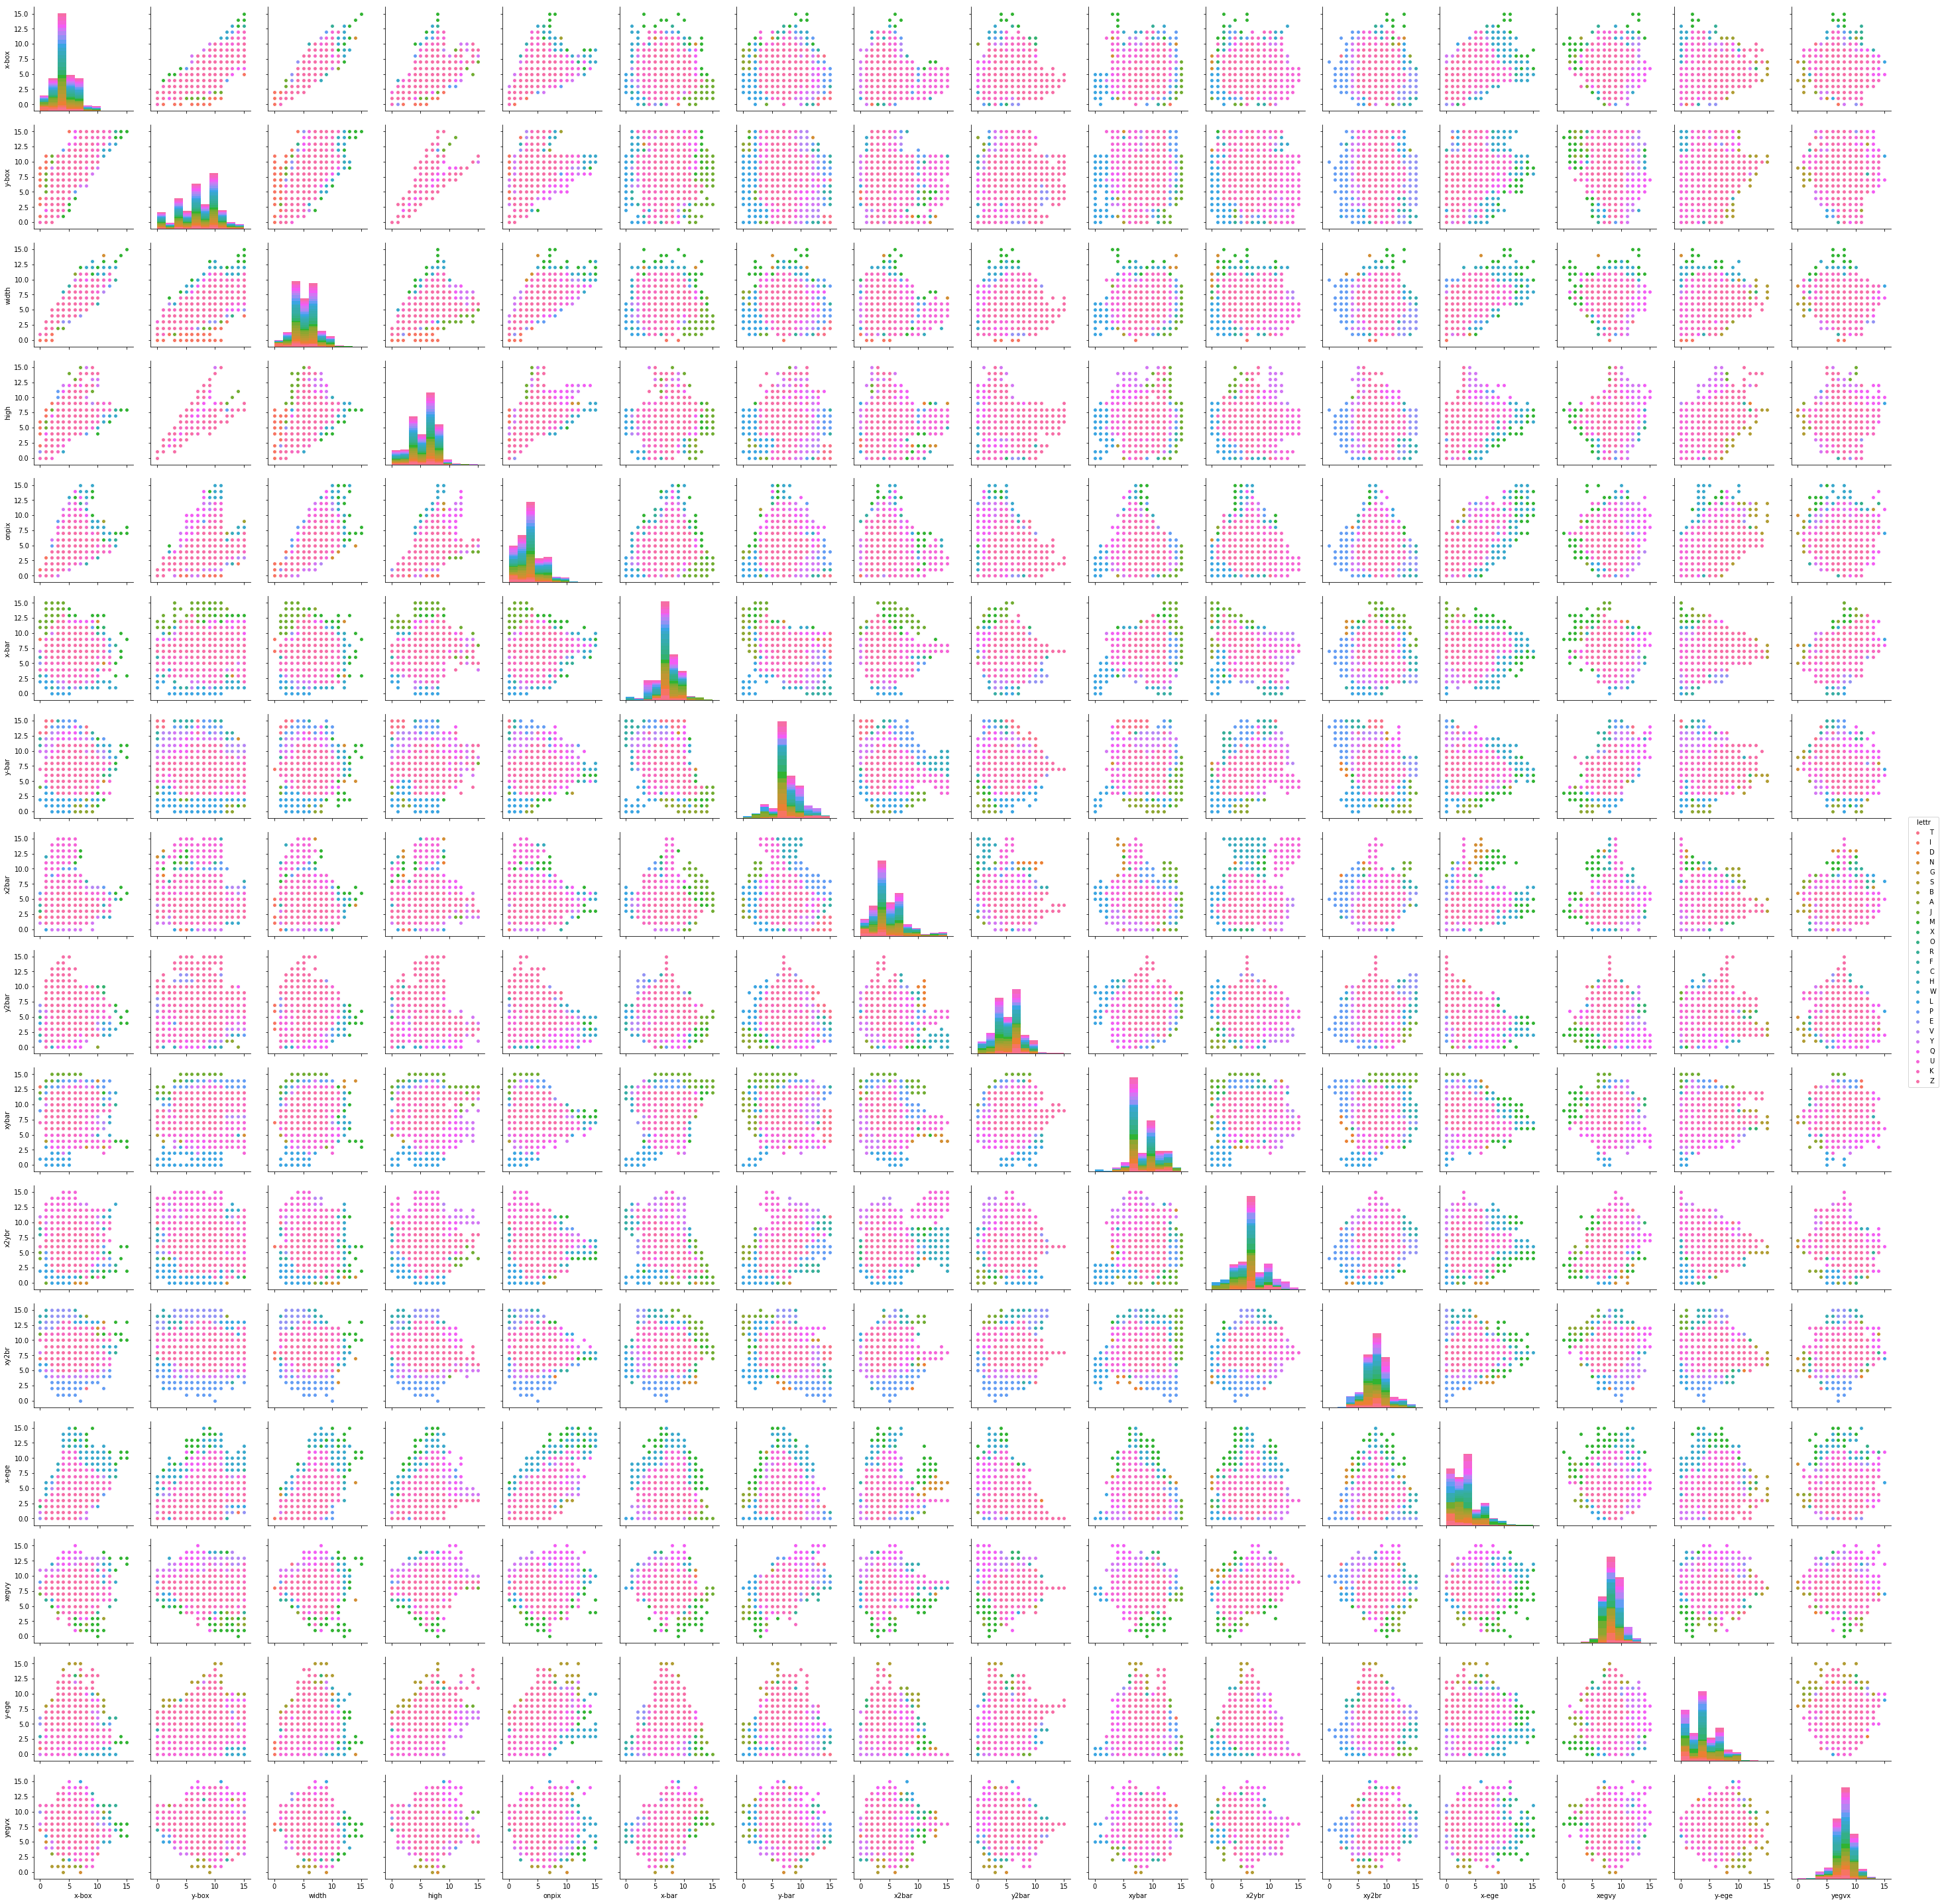

In [11]:
sb.pairplot(letter_data,hue="lettr")

# Step 5:Classification

In [12]:
X = letter_data[['x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar',
                 'x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']].values
Y = letter_data['lettr'].values
validation_size = 0.20
seed = 42
(X_train,X_validation,Y_train,Y_validaion)=train_test_split(X,Y, test_size=validation_size,
                                                            random_state=seed)

In [13]:
#Test options and evaluation metric
num_folds=10
seed=42
scoring='accuracy'

In [14]:
# Check Algorithms
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RFC: 0.932375 (0.005672)
KNN: 0.947188 (0.005335)


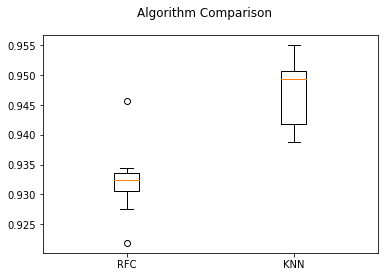

In [15]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
#RFC
RFC = RandomForestClassifier()
parameter_grid = {'n_estimators': [5, 10, 25, 50],'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4],'warm_start': [True, False]}

cross_validation = StratifiedKFold(Y,n_folds=10)

grid_search = GridSearchCV(RFC,param_grid=parameter_grid,cv=cross_validation)

grid_search.fit(X,Y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
grid_search.best_estimator_

Best score: 0.9641
Best parameters: {'max_features': 4, 'n_estimators': 50, 'criterion': 'gini', 'warm_start': True}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

[3 6 5 6 4 6 7 3 8 8 6 9 3 7 7 6]	-->(Prediction:	T)	(Actual: T)
[ 4 11  6  8  8  7  8  3  5  6  6 10  6 11  7  5]	-->(Prediction:	L)	(Actual: L)
[ 3  4  5  3  2 10  2  2  1  9  2  9  2  6  2  8]	-->(Prediction:	A)	(Actual: A)
[ 2  4  2  3  2  7  7  5  7  7  6  8  2  8  5 10]	-->(Prediction:	E)	(Actual: E)
[4 5 5 7 3 8 7 8 6 6 7 9 3 8 5 9]	-->(Prediction:	Q)	(Actual: Q)
[ 4 10  4  7  4  3  8  5  9  7  6 13  0  8  7  9]	-->(Prediction:	E)	(Actual: E)
[3 5 4 3 2 8 7 7 4 9 6 8 2 8 3 8]	-->(Prediction:	O)	(Actual: O)
[ 2  2  2  3  2  8  8  5  2  7  8 10  2  9  4  8]	-->(Prediction:	Q)	(Actual: Q)
[ 4  8  6  6  4  6  6  6  6  7  5 11  3 10  4  9]	-->(Prediction:	G)	(Actual: G)
[2 3 3 2 2 8 7 6 4 9 5 8 2 8 2 8]	-->(Prediction:	O)	(Actual: O)


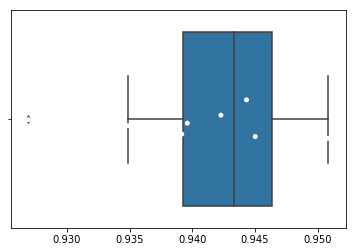

In [35]:
# Let's plot the cross-validation scores
RFC_scores = cross_val_score(RFC, X, Y, cv=10)
sb.boxplot(RFC_scores)
sb.stripplot(RFC_scores, jitter=True, color='white')
# Some of the predictions from the classifier
(X_train,X_validation,Y_train,Y_validaion)=train_test_split(X,Y,test_size=validation_size,
                                                            random_state=seed)
RFC.fit(X_train,Y_train)
for input_features, prediction, actual in zip(X_validation[:10],RFC.predict(X_validation[:10]),
                                              Y_validaion[:10]):
    print('{}\t-->(Prediction:\t{})\t(Actual: {})'.format(input_features, prediction, actual))

In [36]:
# KNN Algorithm tuning
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid=dict(n_neighbors=k_values)
knn = KNeighborsClassifier()
cross_validation = StratifiedKFold(Y, n_folds=10)
grid_search = GridSearchCV(knn,param_grid=param_grid,cv=cross_validation)
grid_search.fit(X,Y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.95995
Best parameters: {'n_neighbors': 1}


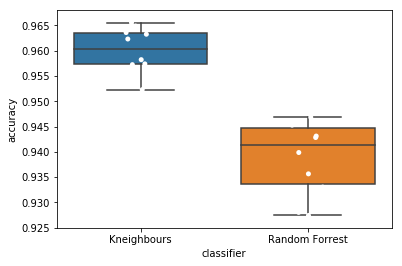

In [38]:
#Compare the  classifiers performance
knn = grid_search.best_estimator_
knn_df = pd.DataFrame({'accuracy': cross_val_score(knn,X,Y,cv=10),'classifier': ['Kneighbours'] * 10})
RFC_df = pd.DataFrame({'accuracy': cross_val_score(RFC,X,Y, cv=10),'classifier': ['Random Forrest'] * 10})
both_df = knn_df.append(RFC_df)
sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='white')

In [43]:
# Make predictions on validation dataset
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validaion, predictions))
print(confusion_matrix(Y_validaion, predictions))
print(classification_report(Y_validaion, predictions))

0.952
[[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 141   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   7   0   0   0   1]
 [  0   0 132   0   1   0   2   0   0   0   0   1   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [  0   0   0 149   0   0   0   4   0   0   0   0   0   0   0   0   0   1
    2   0   0   0   0   0   0   0]
 [  0   0   3   0 135   0   0   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   1   0   1]
 [  0   1   0   0   0 130   0   0   0   0   0   0   0   0   0   5   0   0
    0   2   0   1   0   1   0   0]
 [  0   0   0   1   1   0 153   1   0   0   0   0   0   0   1   0   0   0
    1   0   0   1   1   0   0   0]
 [  0   3   0   2   1   0   0 123   0   0   4   0   1   1   1   1   0   6
    0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0 136   9   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   0   0

[3 6 5 6 4 6 7 3 8 8 6 9 3 7 7 6]	-->(Prediction:	T)	(Actual: T)
[ 4 11  6  8  8  7  8  3  5  6  6 10  6 11  7  5]	-->(Prediction:	L)	(Actual: L)
[ 3  4  5  3  2 10  2  2  1  9  2  9  2  6  2  8]	-->(Prediction:	A)	(Actual: A)
[ 2  4  2  3  2  7  7  5  7  7  6  8  2  8  5 10]	-->(Prediction:	E)	(Actual: E)
[4 5 5 7 3 8 7 8 6 6 7 9 3 8 5 9]	-->(Prediction:	Q)	(Actual: Q)
[ 4 10  4  7  4  3  8  5  9  7  6 13  0  8  7  9]	-->(Prediction:	E)	(Actual: E)
[3 5 4 3 2 8 7 7 4 9 6 8 2 8 3 8]	-->(Prediction:	O)	(Actual: O)
[ 2  2  2  3  2  8  8  5  2  7  8 10  2  9  4  8]	-->(Prediction:	Q)	(Actual: Q)
[ 4  8  6  6  4  6  6  6  6  7  5 11  3 10  4  9]	-->(Prediction:	G)	(Actual: G)
[2 3 3 2 2 8 7 6 4 9 5 8 2 8 2 8]	-->(Prediction:	O)	(Actual: O)


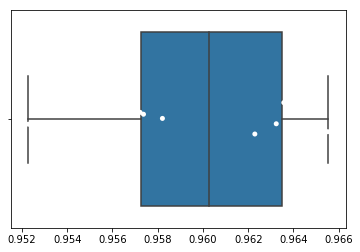

In [42]:
# Let's plot the cross-validation scores
knn_scores = cross_val_score(knn, X, Y, cv=10)
sb.boxplot(knn_scores)
sb.stripplot(knn_scores, jitter=True, color='white')
# Some of the predictions from the classifier
knn.fit(X_train,Y_train)
for input_features, prediction, actual in zip(X_validation[:10],
                                              knn.predict(X_validation[:10]),
                                              Y_validaion[:10]):
    print('{}\t-->(Prediction:\t{})\t(Actual: {})'.format(input_features, prediction, actual))